#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import psycopg2
import sqlite3
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

#Loading the Dataset

In [2]:
# Database connection
url = URL.create(
    drivername="postgresql+psycopg2",
    username="postgres",
    password="Aditi@123",
    host="localhost",
    port=5432,
    database="postgres"
)
engine = create_engine(url)

# Read table into DataFrame
df = pd.read_sql("SELECT * FROM vendor_sales_summary1", engine)

# Show top rows
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchseRatio
0,9165,ULTRA BEVERAGE COMPANY LLP,17864,Mermelada Sassy Red,7.89,750.0,11.99,16.0,1.262400e+02,8.0,9.592000e+01,4.796000e+01,0.88,272218.80,-3.032000e+01,-31.609675,0.500000,0.759823
1,6213,MHW LTD,967,Chopin Vodka,24.80,1000.0,31.99,96.0,2.380800e+03,32.0,1.023680e+03,1.023680e+03,33.60,38486.32,-1.357120e+03,-132.572679,0.333333,0.429973
2,1265,BLACK ROCK SPIRITS LLC,3599,Bakon Vodka,14.05,750.0,24.99,656.0,9.216800e+03,328.0,8.196720e+03,3.298680e+03,258.20,23.16,-1.020080e+03,-12.444978,0.500000,0.889324
3,9552,M S WALKER INC,726,Allen's Blue Curacao Liqueur,4.79,1000.0,5.99,8.0,3.832000e+01,4.0,2.396000e+01,2.396000e+01,4.20,222207.28,-1.436000e+01,-59.933222,0.500000,0.625261
4,9552,M S WALKER INC,27027,Leyda Lot 21 Pnt Nr,25.97,750.0,39.99,488.0,1.267336e+04,76.0,3.039240e+03,2.559360e+03,8.36,222207.28,-9.634120e+03,-316.991090,0.155738,0.239813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,1104872.0,2.418565e+07,543352.0,1.689243e+07,2.183113e+06,998351.32,1028128.28,-7.293218e+06,-43.174472,0.491778,0.698449
10688,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,1613456.0,2.608958e+07,801648.0,1.790389e+07,1.680200e+06,1472971.20,1028128.28,-8.185692e+06,-45.720183,0.496851,0.686247
10689,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,1499256.0,2.734643e+07,748560.0,1.815248e+07,1.844561e+06,1375416.28,495120.88,-9.193947e+06,-50.648428,0.499288,0.663797
10690,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,1312304.0,3.043233e+07,640988.0,1.927629e+07,2.246049e+06,1177754.64,579716.96,-1.115604e+07,-57.874381,0.488445,0.633415


#Exploratory Data Analysis

In [3]:
df.describe().T #Transpose

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.000000e+00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,5.800000e+01,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,3.600000e-01,6.840000,10.455000,19.482500,5.681810e+03
volume,10692.0,8.473605e+02,664.309212,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,3.564367e+01,148.246016,4.900000e-01,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseQuantity,10692.0,2.512709e+04,88760.694150,8.000000e+00,288.000000,2096.000000,15806.000000,2.701280e+06
TotalPurchaseDollars,10692.0,2.408535e+05,984542.397016,5.680000e+00,3627.660000,29243.720000,165905.960000,3.049001e+07
TotalSalesQuantity,10692.0,1.230993e+04,43811.405563,0.000000e+00,132.000000,1044.000000,7717.000000,1.339756e+06
TotalSalesDollars,10692.0,1.689563e+05,670621.063935,0.000000e+00,2916.880000,21192.180000,113587.660000,2.040768e+07
TotalSalesPrice,10692.0,7.517513e+04,179811.093542,0.000000e+00,1158.840000,11431.200000,64238.250000,2.691277e+06


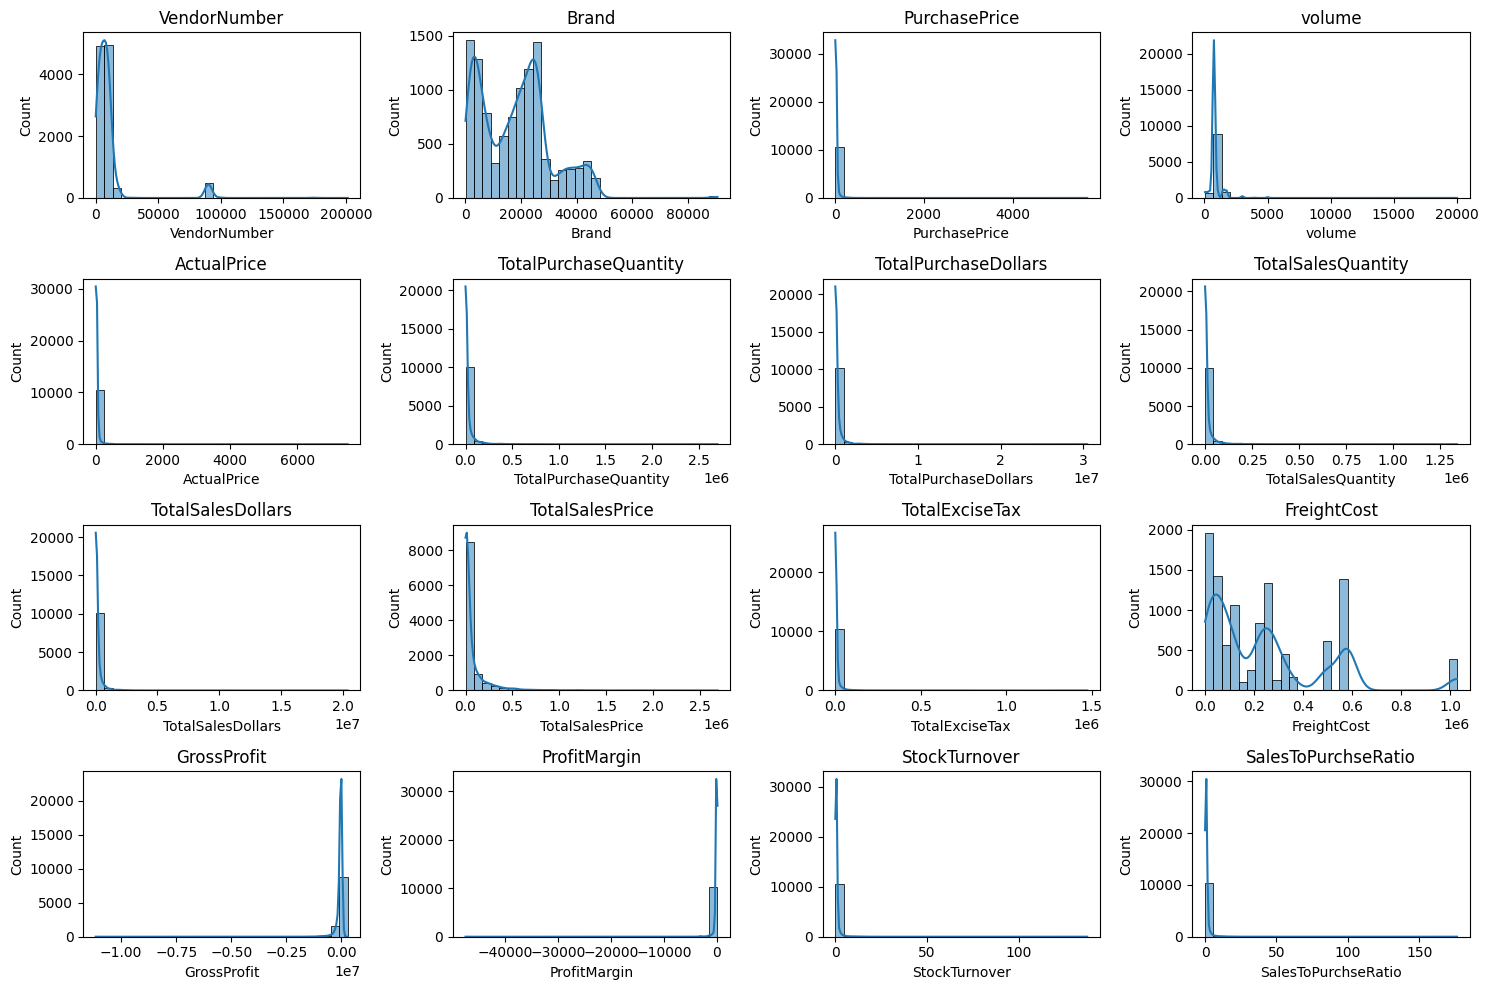

In [4]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjusting grid layout
    sns.histplot(df[col], kde=True , bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

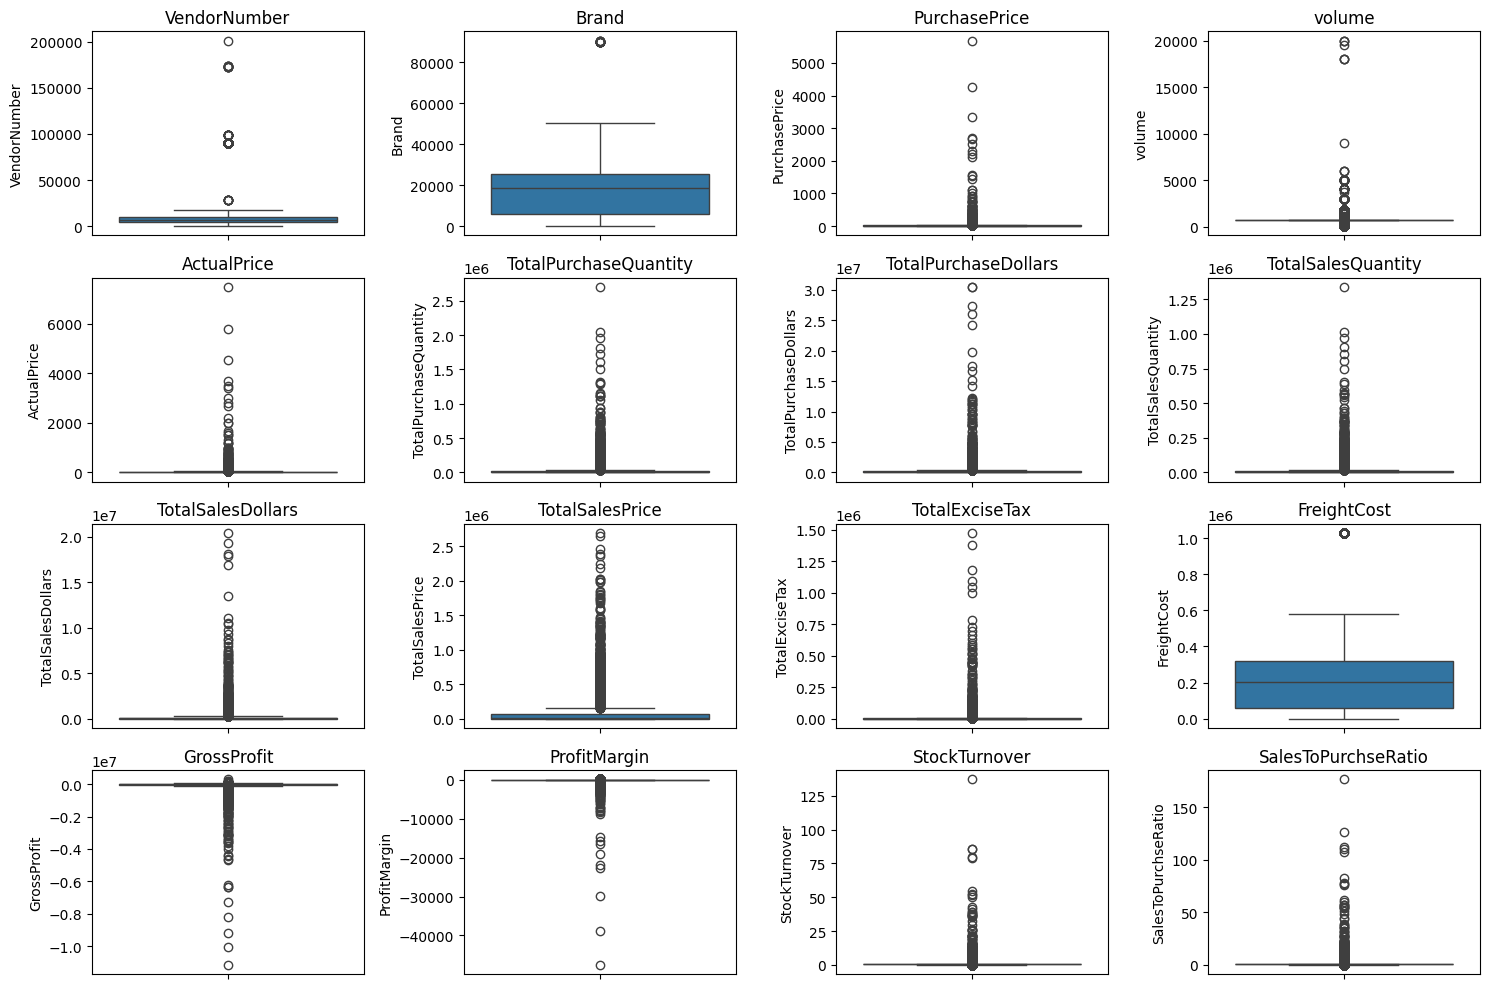

In [5]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjusting grid layout
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#Summary Statistics Insights

In [6]:
min_gross = pd.read_sql_query("""Select *
FROM vendor_sales_summary1
WHERE "TotalSalesQuantity"> 0""",engine)
min_gross

,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchseRatio
0,9165,ULTRA BEVERAGE COMPANY LLP,17864,Mermelada Sassy Red,7.89,750.0,11.99,16.0,1.262400e+02,8.0,9.592000e+01,4.796000e+01,0.88,272218.80,-3.032000e+01,-31.609675,0.500000,0.759823
1,6213,MHW LTD,967,Chopin Vodka,24.80,1000.0,31.99,96.0,2.380800e+03,32.0,1.023680e+03,1.023680e+03,33.60,38486.32,-1.357120e+03,-132.572679,0.333333,0.429973
2,1265,BLACK ROCK SPIRITS LLC,3599,Bakon Vodka,14.05,750.0,24.99,656.0,9.216800e+03,328.0,8.196720e+03,3.298680e+03,258.20,23.16,-1.020080e+03,-12.444978,0.500000,0.889324
3,9552,M S WALKER INC,726,Allen's Blue Curacao Liqueur,4.79,1000.0,5.99,8.0,3.832000e+01,4.0,2.396000e+01,2.396000e+01,4.20,222207.28,-1.436000e+01,-59.933222,0.500000,0.625261
4,9552,M S WALKER INC,27027,Leyda Lot 21 Pnt Nr,25.97,750.0,39.99,488.0,1.267336e+04,76.0,3.039240e+03,2.559360e+03,8.36,222207.28,-9.634120e+03,-316.991090,0.155738,0.239813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,1104872.0,2.418565e+07,543352.0,1.689243e+07,2.183113e+06,998351.32,1028128.28,-7.293218e+06,-43.174472,0.491778,0.698449
10510,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,1613456.0,2.608958e+07,801648.0,1.790389e+07,1.680200e+06,1472971.20,1028128.28,-8.185692e+06,-45.720183,0.496851,0.686247
10511,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,1499256.0,2.734643e+07,748560.0,1.815248e+07,1.844561e+06,1375416.28,495120.88,-9.193947e+06,-50.648428,0.499288,0.663797
10512,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,1312304.0,3.043233e+07,640988.0,1.927629e+07,2.246049e+06,1177754.64,579716.96,-1.115604e+07,-57.874381,0.488445,0.633415


In [7]:
#lets the filter the data by removing inconsistencies
df = pd.read_sql_query("""Select *
FROM vendor_sales_summary1
WHERE "GrossProfit"> 0
AND "ProfitMargin">0
AND "TotalSalesQuantity">0""",engine)

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchseRatio
0,12546,JIM BEAM BRANDS COMPANY,6064,Sauza Sprklg Wild Berry Marg,4.99,750.0,6.99,8.0,39.92,16.0,111.84,111.84,12.64,495523.88,71.92,64.306152,2.000000,2.801603
1,90047,CRUSH WINES,22625,True Myth Cab,6.19,750.0,14.99,17528.0,108498.32,7432.0,124423.68,59557.36,827.84,5830.92,15925.36,12.799300,0.424007,1.146780
2,9165,ULTRA BEVERAGE COMPANY LLP,21691,Tracia Syrah,5.17,750.0,7.49,8.0,41.36,24.0,179.76,149.80,2.64,272218.80,138.40,76.991544,3.000000,4.346228
3,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,50.0,0.99,8.0,5.68,344.0,340.56,134.64,17.84,155979.12,334.88,98.332159,43.000000,59.957746
4,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,8.0,11.76,288.0,573.12,310.44,60.48,1028128.28,561.36,97.948074,36.000000,48.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,4425,MARTIGNETTI COMPANIES,24786,Opus One 12,159.73,750.0,245.99,3496.0,558416.08,2556.0,635854.44,172161.08,287.08,579716.96,77438.36,12.178630,0.731121,1.138675
1772,1392,CONSTELLATION BRANDS INC,15229,The Prisoner Red Napa Valley,26.11,750.0,40.99,23496.0,613480.56,16576.0,710274.24,369933.84,1843.48,318115.96,96793.68,13.627649,0.705482,1.157778
1773,1392,CONSTELLATION BRANDS INC,6599,Estancia Cab Svgn Paso Roble,5.78,750.0,12.99,111448.0,644169.44,55352.0,650812.48,264479.08,6181.12,318115.96,6643.04,1.020730,0.496662,1.010313
1774,7153,PINE STATE TRADING CO,44228,Clean Slate Rsl Mosel,5.59,750.0,10.99,117016.0,654119.44,62872.0,666074.28,278558.20,7014.60,63539.28,11954.84,1.794821,0.537294,1.018276


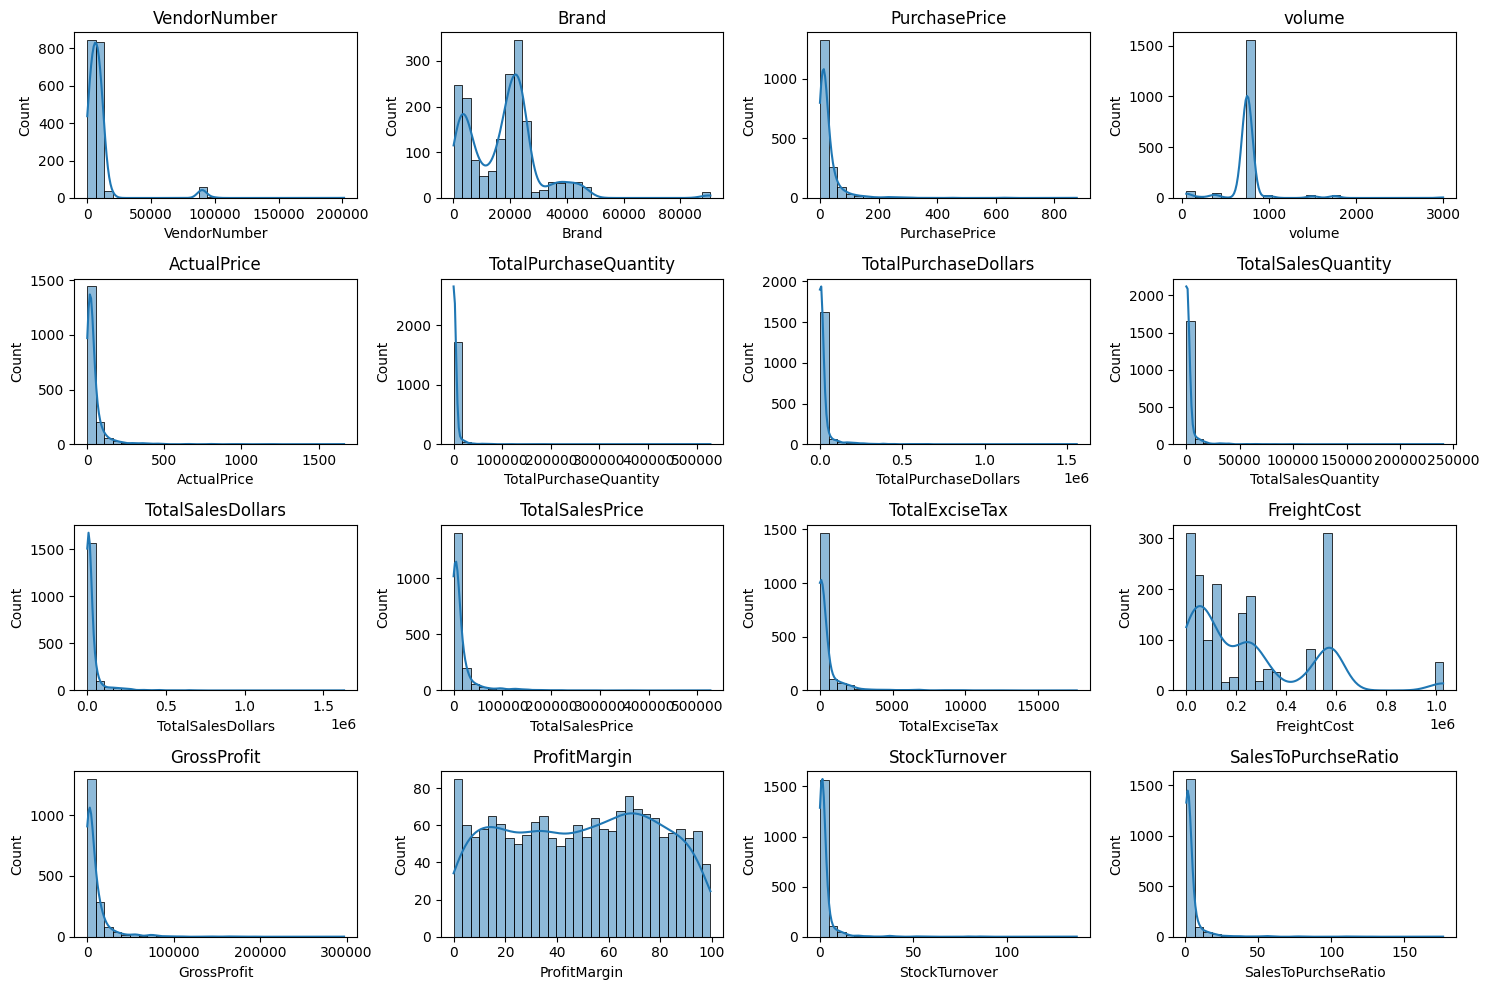

In [9]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjusting grid layout
    sns.histplot(df[col], kde=True , bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

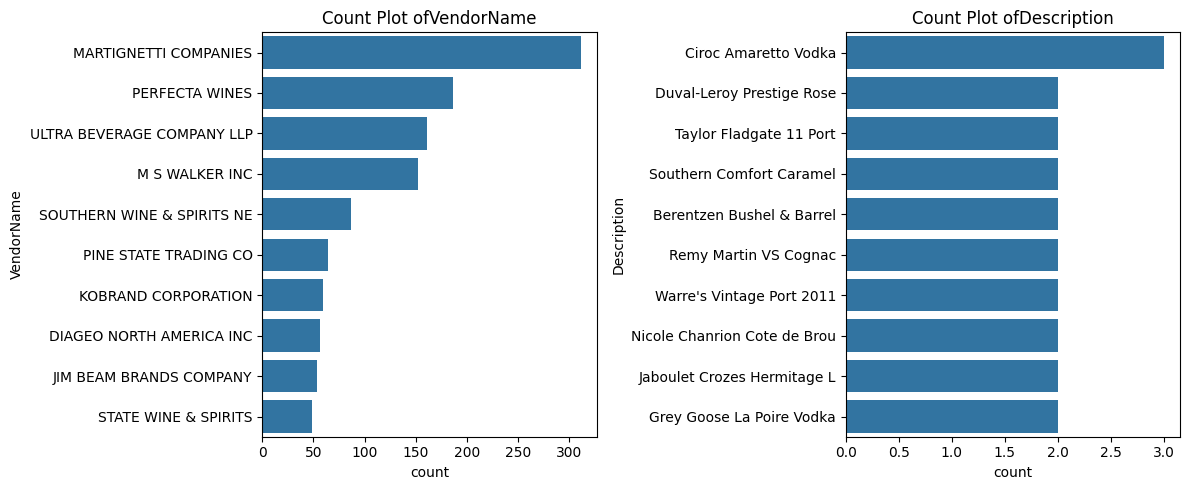

In [10]:
#Count plots for categorical columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) #Top 10 Categories
    plt.title(f"Count Plot of{col}")
plt.tight_layout()
plt.show()

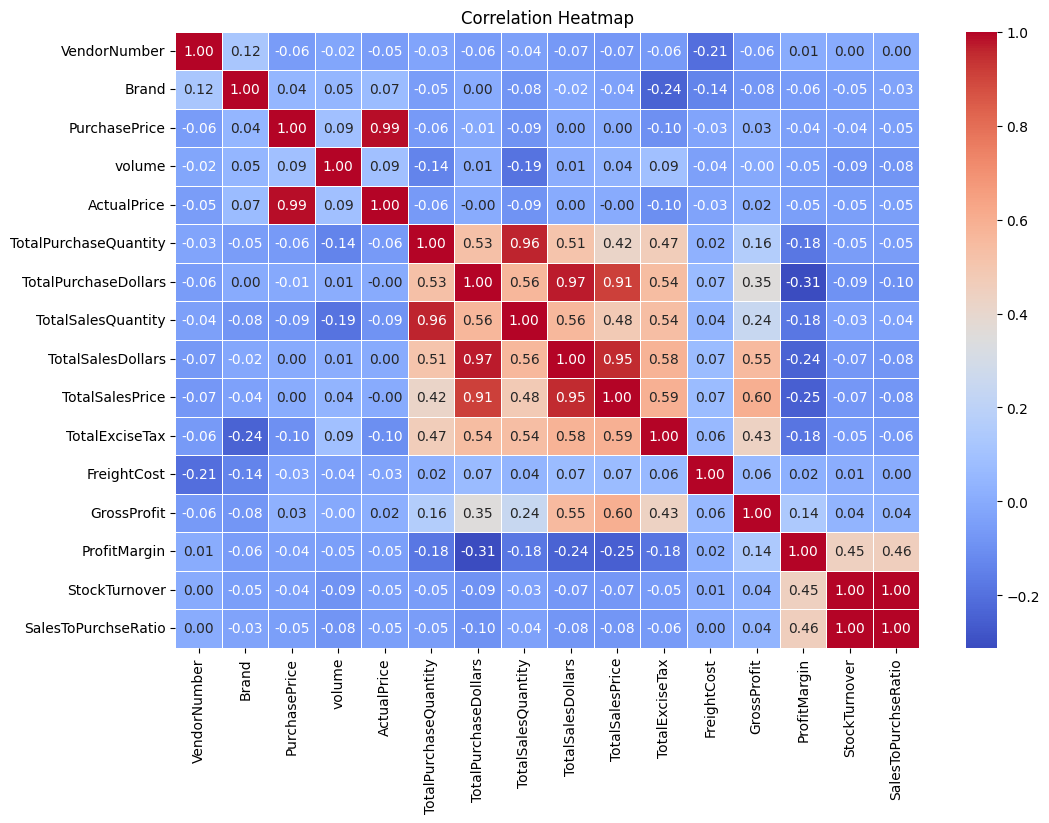

In [11]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap = "coolwarm",linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Insights

*PurchasePrice has weak correlation with TotalSalesDollars(-0.012) and GrossProfit(-0.016) suggesting that price variations do not significantly impact sales revenue or profit.
*Strong Correlation between total purchase quantity and total sales quantity(0.999),confirming effienct invetory turnover.
*Negative correlation between profit margin and total  sales price(-0.179) suggests that as sales price increases ,margin decrease ,possibly due to competetive pricing pressures.
*StockTurner has week negative correlations with both GrossProfit(-0.038) and ProfitMargin(-0.055) ,indicating that faster turnover does not neccessarily result in higher profitability.

Identify brands that needs promotional and pricing Adjustments which exhibit lower sales performance but higher profit margin

In [12]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [13]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,12 Days of Pearls Gift Set,1238.76,95.356647
1,13 Celsius Svgn Bl,136164.92,15.339957
2,1800 Select Silver Tequila,8517.16,78.891555
3,20 Mile 09 Brdx Superior,7797.92,67.538010
4,3 Blind Moose Cab Svgn Cal,25377.88,10.160502
...,...,...,...
1740,Zhenka Vodka 80 Proof,961.56,74.607929
1741,Zinsane Znfdl Lodi,59157.96,96.763107
1742,Zion Dolev Muscato,5319.16,44.550643
1743,Zorah Red,1671.24,35.118834


In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_sales_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

np.float64(1940.3040000000017)

In [16]:
high_margin_sales_threshold

np.float64(82.48640456102117)

In [17]:
#filter brands with low sales but high profits
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_sales_threshold)
]
print("Brands with low sales but high profits")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profits


,Description,TotalSalesDollars,ProfitMargin
668,Dr McGillicuddy's Apple Pie,262.64,92.872373
1313,Promesses de France CdRhone,287.64,84.675289
1585,The Club Mudslide,334.32,82.651352
1605,Three Olives Grape Vodka,340.56,98.332159
71,Aresti Pnt Nr Curico Vly,379.24,93.080899
1586,The Club Strawbry Margarita,573.12,97.948074
1273,Piehole Apple Pie,625.68,94.476410
1361,Riunite Sweet White,646.92,94.929821
1409,Sauza Sparkling Margarita,671.04,93.586075
609,DeKuyper Buttershots Trav,703.36,91.878981


In [18]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] #for better visualisation

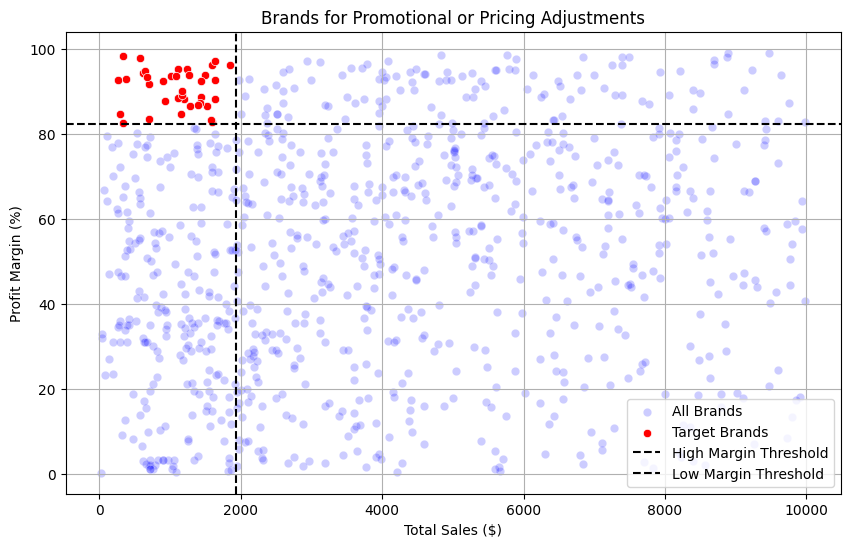

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color='blue',label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='red',label="Target Brands")


plt.axhline(high_margin_sales_threshold,linestyle='--',color='black',label="High Margin Threshold")
plt.axvline(low_sales_threshold,linestyle='--',color='black',label="Low Margin Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendor and brands demonstrate the highest sales performance?

In [20]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [21]:
#Top vendor and Brands by Sale performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         12825385.28
ULTRA BEVERAGE COMPANY LLP     5386560.16
CONSTELLATION BRANDS INC       3566741.76
PERFECTA WINES                 3350776.16
M S WALKER INC                 2712607.00
MOET HENNESSY USA INC          1918991.32
DIAGEO NORTH AMERICA INC       1862703.32
BACARDI USA INC                1637325.44
SOUTHERN WINE & SPIRITS NE     1528834.72
PINE STATE TRADING CO          1410745.24
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands

Description
J Lohr Seven Oaks Cab Svgn      1632591.88
The Prisoner Red Napa Valley     710274.24
Clean Slate Rsl Mosel            666074.28
Estancia Cab Svgn Paso Roble     650812.48
Opus One 12                      635854.44
Grand Marnier                    557658.92
WhistlePig 10 Yr Old Rye         515089.72
Jadot Macon Villages Blanc       480497.36
Acumen Moutainside Red Napa      459316.20
Hennessey VS +VSOP 50mL          452895.88
Name: TotalSalesDollars, dtype: float64

In [23]:
top_brands.apply(lambda x: format_dollars(x))

Description
J Lohr Seven Oaks Cab Svgn         1.6M
The Prisoner Red Napa Valley    710.27K
Clean Slate Rsl Mosel           666.07K
Estancia Cab Svgn Paso Roble    650.81K
Opus One 12                     635.85K
Grand Marnier                   557.66K
WhistlePig 10 Yr Old Rye        515.09K
Jadot Macon Villages Blanc      480.50K
Acumen Moutainside Red Napa     459.32K
Hennessey VS +VSOP 50mL         452.90K
Name: TotalSalesDollars, dtype: object

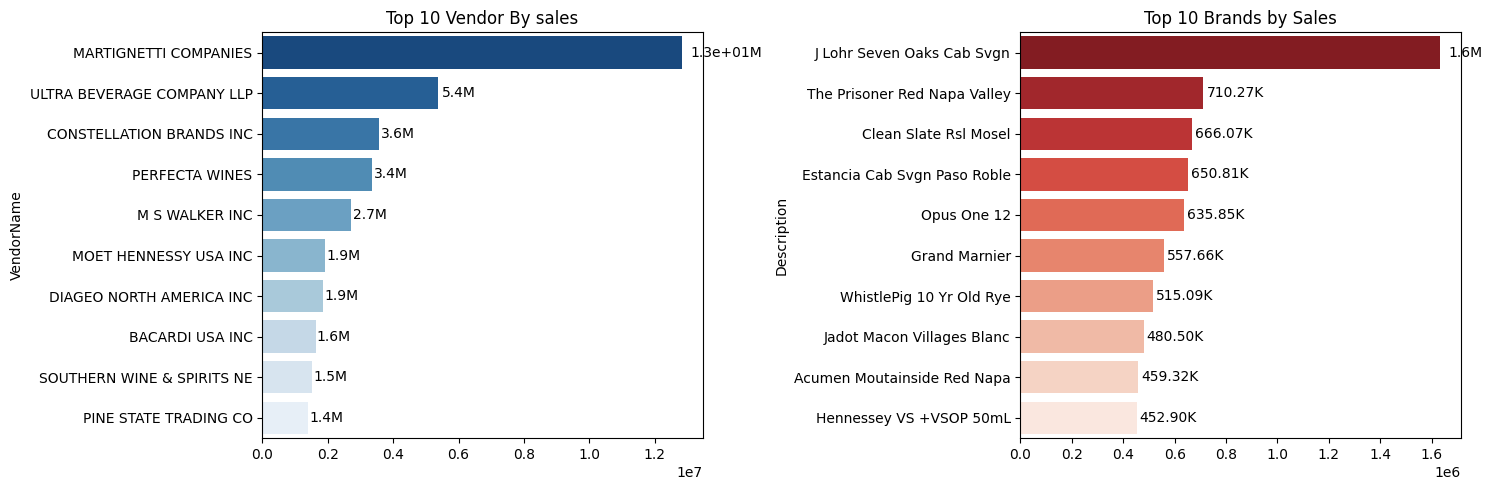

In [24]:
plt.figure(figsize=(15,5))

#Plot the figure
plt.subplot(1,2,1)
ax1= sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 Vendor By sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() /2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

#Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() /2,
             format_dollars(bar.get_width()),
             ha = 'left',va='center',fontsize=10,color='black')

plt.tight_layout()
plt.show()

#Which vendors contribute the most to the total purchase dollars

In [25]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [26]:
vendor_performance.shape

(84, 4)

In [27]:
total_purchase_all = vendor_performance['TotalPurchaseDollars'].sum()
vendor_performance['PurchaseContribution%'] = (
    vendor_performance['TotalPurchaseDollars'] / total_purchase_all * 100
)


In [28]:
round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2).head(10)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
38,MARTIGNETTI COMPANIES,9392863.04,3432522.24,12825385.28,25.43
75,ULTRA BEVERAGE COMPANY LLP,3568298.64,1818261.52,5386560.16,9.66
10,CONSTELLATION BRANDS INC,3107338.64,459403.12,3566741.76,8.41
48,PERFECTA WINES,1981439.84,1369336.32,3350776.16,5.37
42,MOET HENNESSY USA INC,1572990.32,346001.00,1918991.32,4.26
36,M S WALKER INC,1396301.44,1316305.56,2712607.00,3.78
15,DIAGEO NORTH AMERICA INC,1317240.88,545462.44,1862703.32,3.57
51,PINE STATE TRADING CO,1096440.32,314304.92,1410745.24,2.97
19,E & J GALLO WINERY,1005887.52,165868.88,1171756.40,2.72
3,BANFI PRODUCTS CORP,922020.48,122328.56,1044349.04,2.50


In [29]:
# Top 10 vendors by TotalPurchaseDollars
top_vendors = (
    vendor_performance
    .sort_values('TotalPurchaseDollars', ascending=False)
    .head(10)
)

# Format for readability
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)

print("Top 10 Vendors")
display(top_vendors)


Top 10 Vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
38,MARTIGNETTI COMPANIES,9.4M,3.4M,1.3e+01M,25.433730
75,ULTRA BEVERAGE COMPANY LLP,3.6M,1.8M,5.4M,9.662139
10,CONSTELLATION BRANDS INC,3.1M,459.40K,3.6M,8.413964
48,PERFECTA WINES,2.0M,1.4M,3.4M,5.365287
42,MOET HENNESSY USA INC,1.6M,346.00K,1.9M,4.259299
36,M S WALKER INC,1.4M,1.3M,2.7M,3.780866
15,DIAGEO NORTH AMERICA INC,1.3M,545.46K,1.9M,3.566788
51,PINE STATE TRADING CO,1.1M,314.30K,1.4M,2.968910
19,E & J GALLO WINERY,1.0M,165.87K,1.2M,2.723714
3,BANFI PRODUCTS CORP,922.02K,122.33K,1.0M,2.496621


In [30]:
top_vendors['PurchaseContribution%'].sum()

np.float64(68.6713170922146)

In [31]:
top_vendors['Cumalative_Contribution'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumalative_Contribution
38,MARTIGNETTI COMPANIES,9.4M,3.4M,1.3e+01M,25.433730,25.433730
75,ULTRA BEVERAGE COMPANY LLP,3.6M,1.8M,5.4M,9.662139,35.095869
10,CONSTELLATION BRANDS INC,3.1M,459.40K,3.6M,8.413964,43.509833
48,PERFECTA WINES,2.0M,1.4M,3.4M,5.365287,48.875120
42,MOET HENNESSY USA INC,1.6M,346.00K,1.9M,4.259299,53.134418
36,M S WALKER INC,1.4M,1.3M,2.7M,3.780866,56.915284
15,DIAGEO NORTH AMERICA INC,1.3M,545.46K,1.9M,3.566788,60.482072
51,PINE STATE TRADING CO,1.1M,314.30K,1.4M,2.968910,63.450982
19,E & J GALLO WINERY,1.0M,165.87K,1.2M,2.723714,66.174696
3,BANFI PRODUCTS CORP,922.02K,122.33K,1.0M,2.496621,68.671317


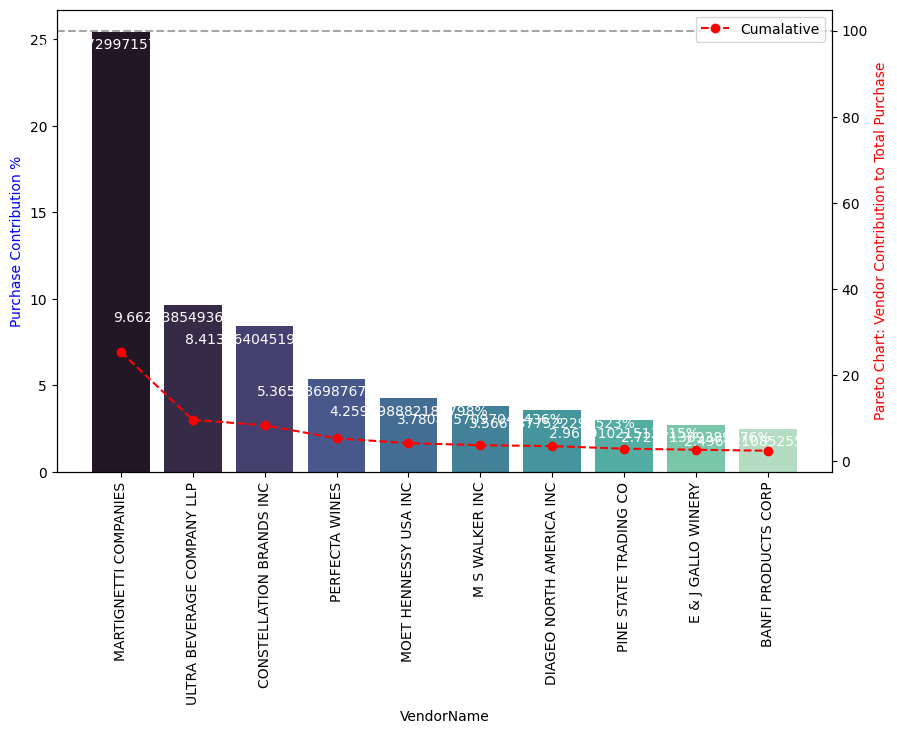

In [32]:
fig,ax1 = plt.subplots(figsize=(10,6))

#Bar plot for purchase Contribution
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'],palette="mako",ax=ax1)

for i,value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1 , str(value)+'%',ha='center',fontsize=10,color='white')

#Line Plot for Cumalative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['PurchaseContribution%'],color='red',marker='o',linestyle='dashed',label='Cumalative')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumalative_Contribution %',color='red')
ax2.set_xlabel('Vendors')
ax2.set_ylabel('Pareto Chart: Vendor Contribution to Total Purchase')

ax2.axhline(y = 100,color='grey',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

How much of total procurement is dependent on the top vendors

In [33]:
print(f"Total Purchase Contribution of 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of 10 vendors is 68.67%


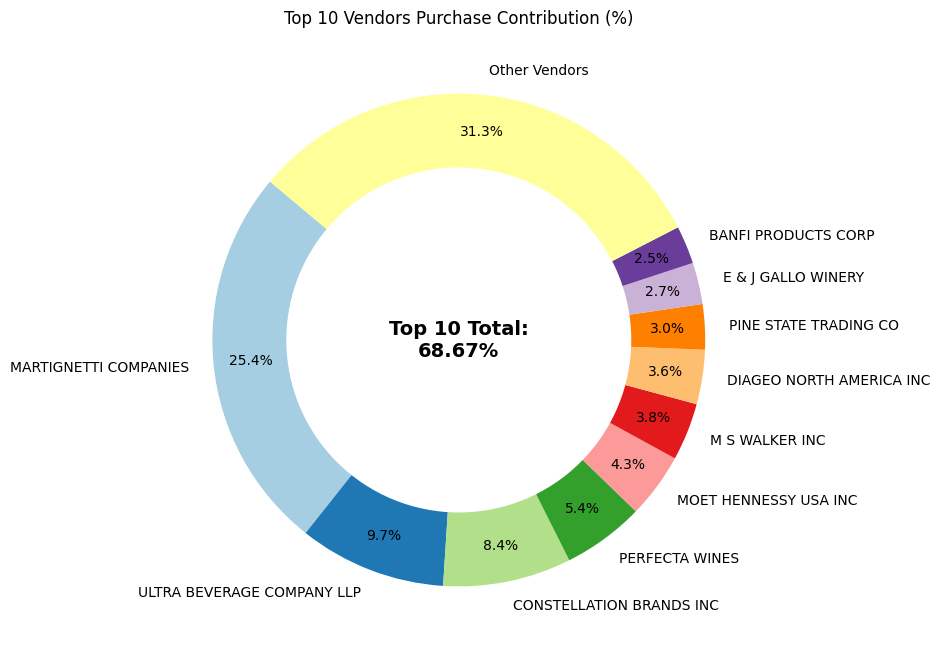

In [34]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

#Append "Other Vendors" Category
vendors.append("Other Vendors")
purchase_contribution.append(remaining_contribution)

#Donut Chart
fig,ax = plt.subplots(figsize=(8,8))
wedges,texts,autotexts = ax.pie(purchase_contribution,labels=vendors, autopct='%1.1f%%',
                                startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a donut effect
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

#Ass Total Contribution Annotation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14, fontweight = 'bold',ha = 'center', va = 'center')

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()

Does purchasing in bulk reduce the unit price,and what is the optimal purchase volume for cost savings?

In [35]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [36]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])


In [37]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,46.787329
Medium,27.817941
Large,12.698844


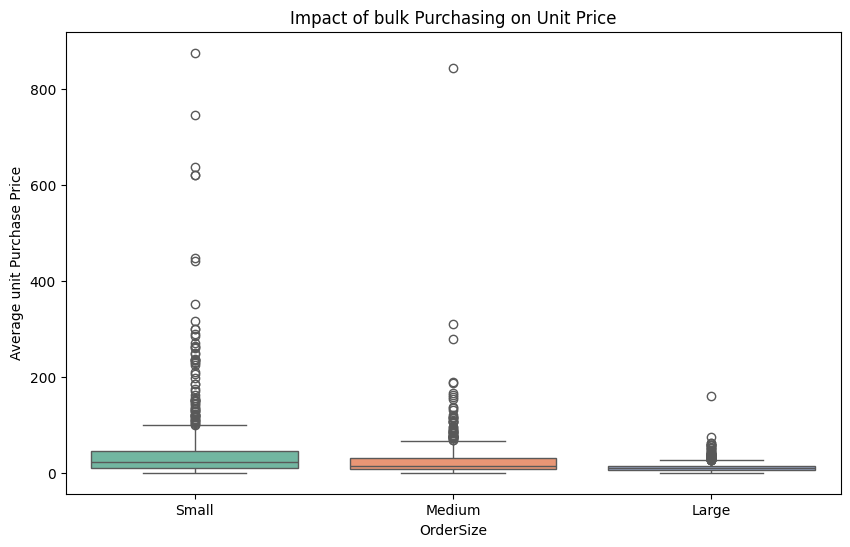

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x= "OrderSize", y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of bulk Purchasing on Unit Price")
plt.xlabel("OrderSize")
plt.ylabel("Average unit Purchase Price")
plt.show()

*Vendors

Which vendors have low inventory turnover ,indicating excess stock and slow moving products?

In [39]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
BROWN-FORMAN CORP,0.393983
WINE GROUP INC,0.496544
JEWELL TOWNE VINEYARDS,0.570007
CHARLES JACQUIN ET CIE INC,0.586178
CRUSH WINES,0.591196
THE IMPORTED GRAPE LLC,0.604167
PALM BAY INTERNATIONAL INC,0.610052
E & J GALLO WINERY,0.611842
VINILANDIA USA,0.615593


#How much capital is locked in unsold inventory per vendor,and which vendors contribute the most to it?

In [40]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) *df["PurchasePrice"]
print('Total Unsold Capital:',format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.3M


In [41]:
#Average Capital Locker per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors with the highest locked Capitals
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending = False)
inventory_value_per_vendor['inventory_value_per_vendor'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue,inventory_value_per_vendor
38,MARTIGNETTI COMPANIES,1658998.32,1.7M
10,CONSTELLATION BRANDS INC,1007416.80,1.0M
19,E & J GALLO WINERY,329092.64,329.09K
42,MOET HENNESSY USA INC,327325.84,327.33K
3,BANFI PRODUCTS CORP,312442.12,312.44K
51,PINE STATE TRADING CO,243645.20,243.65K
14,DIAGEO CHATEAU ESTATE WINES,210905.24,210.91K
25,FREDERICK WILDMAN & SONS,180242.24,180.24K
73,TREASURY WINE ESTATES,166686.32,166.69K
58,SAZERAC CO INC,103456.52,103.46K


#What is the 95% confidence intervals fo profit margin of top-performing and low-performing vendors

In [42]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [43]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= top_threshold]["ProfitMargin"].dropna()

In [44]:
low_vendors

0       64.306152
2       76.991544
3       98.332159
4       97.948074
5       92.872373
          ...    
1482     8.711057
1490     3.040738
1491     1.785358
1498     2.870802
1499     1.377410
Name: ProfitMargin, Length: 1332, dtype: float64

In [45]:
import scipy.stats as stats
def confidence_interval(data , confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1+ confidence) /2, df =len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error , mean_val + margin_of_error

Top Vendors 95% CI:(33.49, 38.58),  Mean:36.04 
Low Vendors 95% CI:(51.68, 54.67),  Mean:53.17 


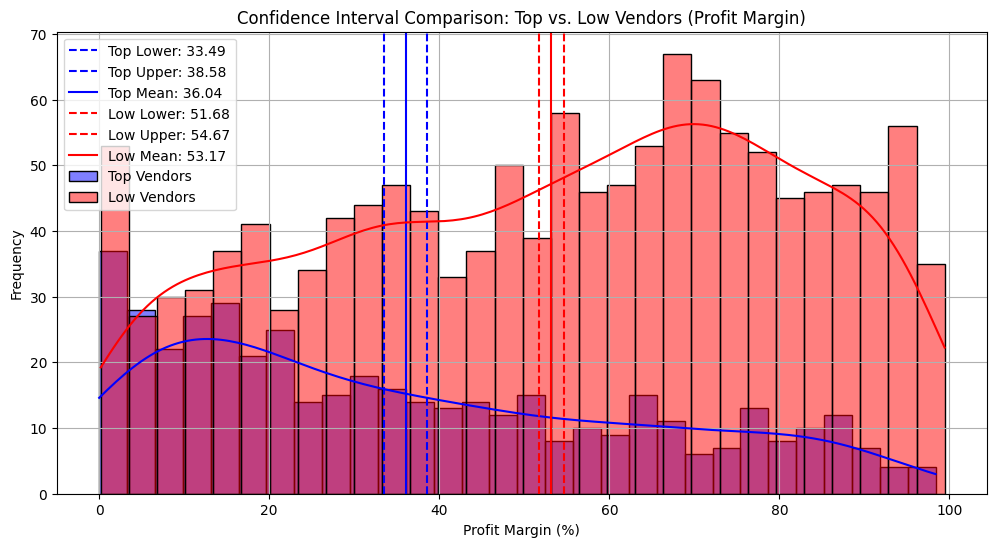

In [46]:
top_mean, top_lower,top_upper = confidence_interval(top_vendors)
low_mean, low_lower,low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI:({top_lower:.2f}, {top_upper:.2f}),  Mean:{top_mean:.2f} ")
print(f"Low Vendors 95% CI:({low_lower:.2f}, {low_upper:.2f}),  Mean:{low_mean:.2f} ")

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean,  color="blue", linestyle="-",  label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,  color="red", linestyle="-",  label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


*The confidence interval for low-performing

Is there a significant difference in profi tmargins between top-performing and low-performing vendors?

Hypothesis:

H0(Null Hypothesis) : There is no significance difference in the mean profit margin of top_performing and low-performing vendors.

H1(Alternative Hypothesis) : The mean profit margin of top-perforrming and low-performing vendors are significantly different.

In [48]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

#Perform two-Sample T-Test
t_stat , p_value = ttest_ind(top_vendors , low_vendors , equal_var=False)

#Print Result
print(f"T-Statistics: {t_stat:4f}, P_value : {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0 :There is a significance difference in the mean profit margin of top_performing and low-performing vendors.")
else:
    print("Fail to reject H1:No significance difference in profit margin")

T-Statistics: -11.410913, P_value : 0.0000
Reject H0 :There is a significance difference in the mean profit margin of top_performing and low-performing vendors.
